In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Datasets\coin_Ethereum.csv")

In [4]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [5]:
df.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11
2159,2160,Ethereum,ETH,2021-07-06 23:59:59,2346.294874,2197.919385,2197.919385,2324.679449,2.089186e+10,2.710286e+11


<AxesSubplot:xlabel='Date'>

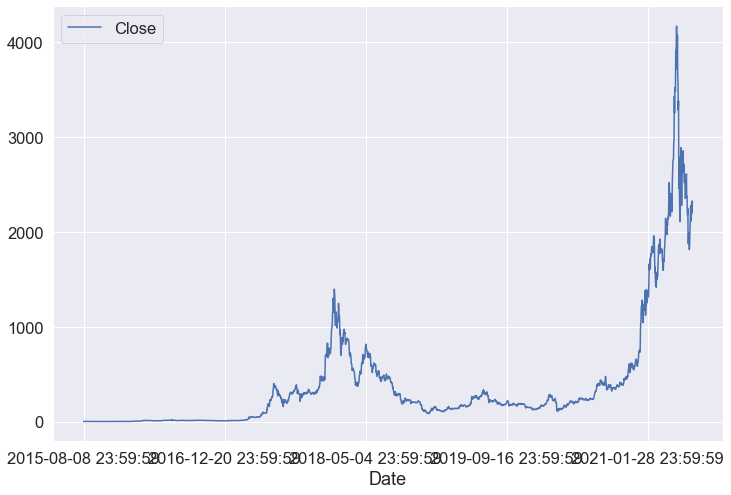

In [6]:

df.plot(x='Date',y='Close',figsize=(12,8))


In [7]:
df1=df.reset_index()['Close']

In [8]:
df1

0          0.753325
1          0.701897
2          0.708448
3          1.067860
4          1.217440
           ...     
2155    2150.040364
2156    2226.114282
2157    2321.724112
2158    2198.582464
2159    2324.679449
Name: Close, Length: 2160, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[7.64097042e-05],
       [6.40717302e-05],
       [6.56433591e-05],
       ...,
       [5.56895640e-01],
       [5.27352985e-01],
       [5.57604648e-01]])

In [11]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(1404, 756)

In [13]:
train_data

array([[7.64097042e-05],
       [6.40717302e-05],
       [6.56433591e-05],
       ...,
       [5.58150216e-02],
       [5.92777148e-02],
       [5.88606835e-02]])

In [14]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 120
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(1283, 120)
(1283,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(635, 120)
(635,)


(None, None)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(120,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_percentage_error'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 120, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=25,verbose=1)

Epoch 1/200
52/52 [==============================] - 7s 143ms/step - loss: 9.4912e-04 - mean_absolute_percentage_error: 741.8320 - val_loss: 0.0040 - val_mean_absolute_percentage_error: 16.1668
Epoch 2/200
52/52 [==============================] - 5s 106ms/step - loss: 2.6647e-04 - mean_absolute_percentage_error: 219.9772 - val_loss: 0.0047 - val_mean_absolute_percentage_error: 16.5302
Epoch 3/200
52/52 [==============================] - 6s 107ms/step - loss: 2.0897e-04 - mean_absolute_percentage_error: 186.5187 - val_loss: 0.0029 - val_mean_absolute_percentage_error: 12.7004
Epoch 4/200
52/52 [==============================] - 6s 115ms/step - loss: 2.0488e-04 - mean_absolute_percentage_error: 208.4059 - val_loss: 0.0031 - val_mean_absolute_percentage_error: 17.6572
Epoch 5/200
52/52 [==============================] - 6s 109ms/step - loss: 1.7875e-04 - mean_absolute_percentage_error: 169.8687 - val_loss: 0.0019 - val_mean_absolute_percentage_error: 14.4982
Epoch 6/200
52/52 [===========

In [23]:
import tensorflow as tf

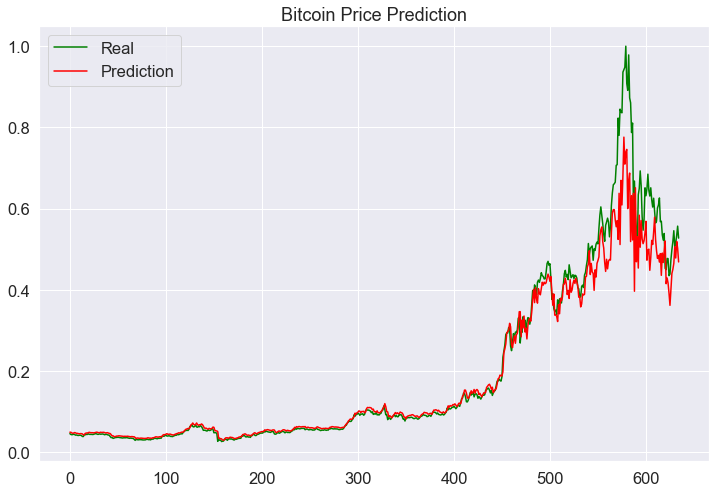

In [24]:
pred = model.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot(ytest, color='green', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

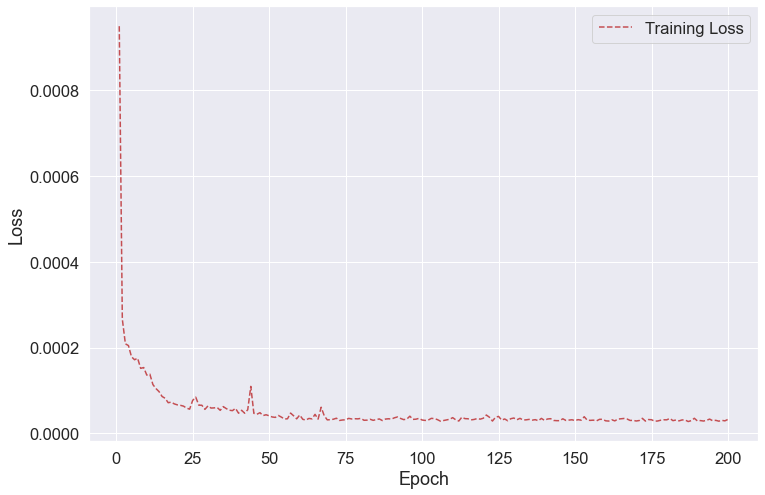

In [25]:
loss = history.history['loss']
epoch = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch, loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

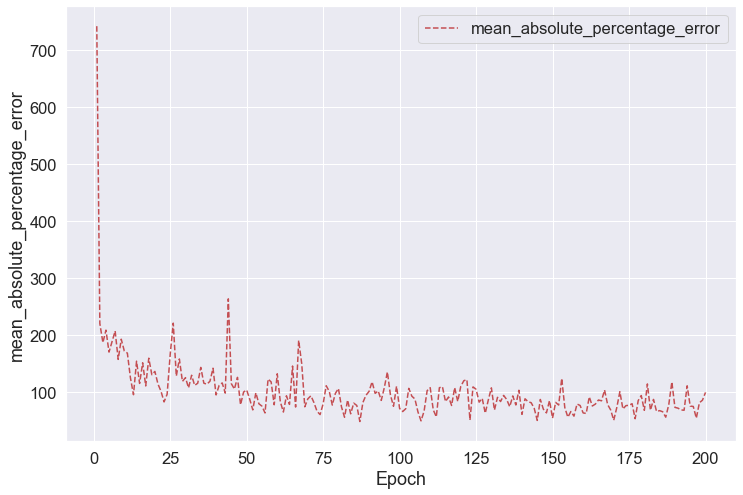

In [26]:
mean_absolute_percentage_error = history.history['mean_absolute_percentage_error']
epoch = range(1, len(mean_absolute_percentage_error) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch,mean_absolute_percentage_error, 'r--')
plt.legend(['mean_absolute_percentage_error'])
plt.xlabel('Epoch')
plt.ylabel('mean_absolute_percentage_error')
plt.show();

In [27]:
loss_and_metrics = model.evaluate(X_test, ytest, verbose=1)

20/20 [==============================] - 1s 30ms/step - loss: 0.0027 - mean_absolute_percentage_error: 8.9587


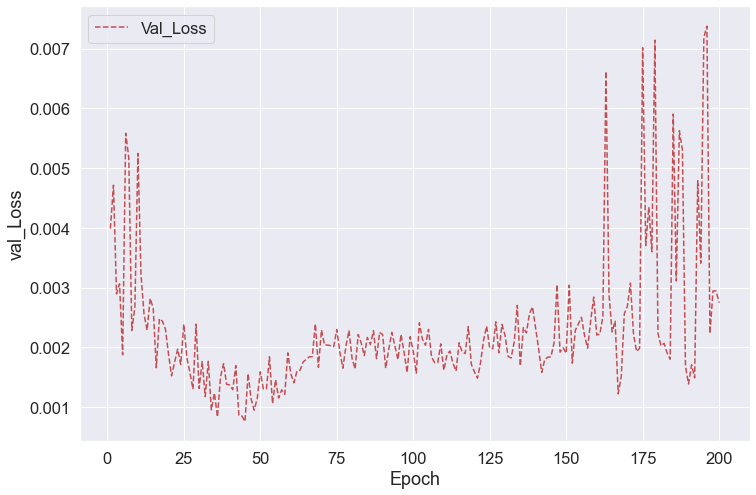

In [28]:
val_loss = history.history['val_loss']
epoch = range(1, len(val_loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch,val_loss, 'r--')
plt.legend(['Val_Loss'])
plt.xlabel('Epoch')
plt.ylabel('val_Loss')
plt.show();

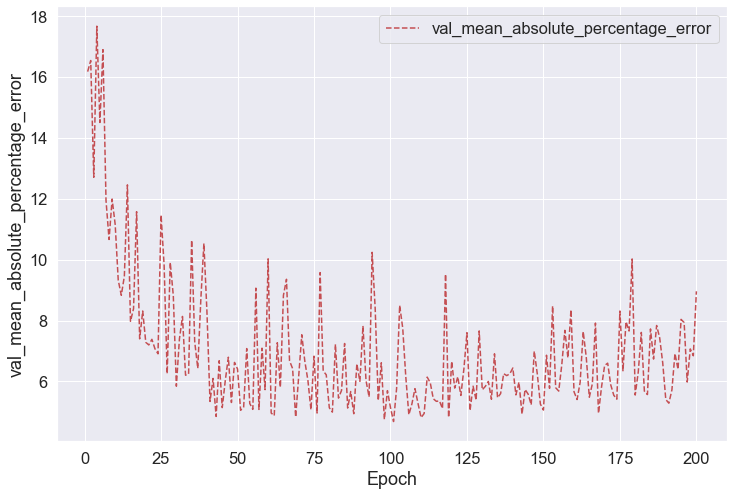

In [29]:
val_mean_absolute_percentage_error = history.history['val_mean_absolute_percentage_error']
epoch = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch, val_mean_absolute_percentage_error, 'r--')
plt.legend(['val_mean_absolute_percentage_error'])
plt.xlabel('Epoch')
plt.ylabel('val_mean_absolute_percentage_error')
plt.show();

In [30]:
print("Test loss", loss_and_metrics[0])
print("Test error", loss_and_metrics[1])

Test loss 0.0027474481612443924
Test error 8.958654403686523


In [31]:
import tensorflow as tf

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
train_predict

array([[0.00353265],
       [0.0035283 ],
       [0.00352199],
       ...,
       [0.06406292],
       [0.06296115],
       [0.060282  ]], dtype=float32)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_train,train_predict)*100
print(mape)

0.5122966498158646


In [35]:
### Test Data RMSE
mape = mean_absolute_error(ytest,test_predict)*100
print(mape)

2.225363775215576


In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_train,train_predict)*100
print(mape)

24244.596394174776


In [38]:
### Test Data RMSE
mape = mean_absolute_error(ytest,test_predict)*100
print(mape)

74823.61191253854


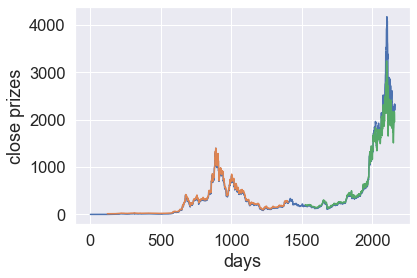

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=120
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.plot()
plt.ylabel('close prizes')
plt.xlabel('days')
plt.show()

In [40]:
len(test_data)

756

In [41]:
x_input=test_data[606:726].reshape(1,-1)
x_input.shape

(1, 120)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input

[0.3871616900893519,
 0.4189228633742508,
 0.4240612509870701,
 0.4183534618641434,
 0.4278429033286787,
 0.4421737149256807,
 0.43511496818074585,
 0.4329496060051143,
 0.4268815990407934,
 0.42718784127263104,
 0.4433554255219894,
 0.46470506569382114,
 0.4701546905265385,
 0.4604070547977009,
 0.4642616688202515,
 0.4274098756416539,
 0.37660000910975716,
 0.3901240445646443,
 0.3539286668345368,
 0.346810579057392,
 0.35015476819873703,
 0.3396170019632461,
 0.37528140848773234,
 0.35798432888901227,
 0.3779552966375461,
 0.36981310100714737,
 0.3677404622900554,
 0.39688124528690105,
 0.4132938915827246,
 0.4400613973370186,
 0.44805534337695535,
 0.43152987351727623,
 0.4380142873324398,
 0.42503706720553086,
 0.46164292527682504,
 0.4448203284884098,
 0.4297392198625725,
 0.4334024841277015,
 0.4373555945486021,
 0.42761671196749484,
 0.43595806209433285,
 0.43476104375935354,
 0.42890307039506326,
 0.4056600754867253,
 0.4026171125012529,
 0.3821681590759391,
 0.382634956347866

In [44]:
from numpy import array

lst_output=[]
n_steps=120
i=0
while(i<30):
    
    if(len(temp_input)>120):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.52182126]
121
1 day input [0.41892286 0.42406125 0.41835346 0.4278429  0.44217371 0.43511497
 0.43294961 0.4268816  0.42718784 0.44335543 0.46470507 0.47015469
 0.46040705 0.46426167 0.42740988 0.37660001 0.39012404 0.35392867
 0.34681058 0.35015477 0.339617   0.37528141 0.35798433 0.3779553
 0.3698131  0.36774046 0.39688125 0.41329389 0.4400614  0.44805534
 0.43152987 0.43801429 0.42503707 0.46164293 0.44482033 0.42973922
 0.43340248 0.43735559 0.42761671 0.43595806 0.43476104 0.42890307
 0.40566008 0.40261711 0.38216816 0.38263496 0.40842094 0.4116963
 0.40566534 0.43645248 0.44277375 0.4601259  0.47426003 0.51407244
 0.48653025 0.50205239 0.50559445 0.50811153 0.47277269 0.500961
 0.49701097 0.51232509 0.51753465 0.51314342 0.551489   0.58409662
 0.60425154 0.58333886 0.56245451 0.53660253 0.51958148 0.5589317
 0.56721833 0.57652278 0.56693869 0.53048219 0.55553669 0.60793789
 0.63873809 0.65877396 0.66129225 0.66520998 0.70663862 0.70811725
 0.82304036 0.7804671  0.8450392  0.83

In [45]:
day_new=np.arange(1,121)
day_pred=np.arange(121,151)

In [46]:
lst_output

[[0.5218212604522705],
 [0.4152795672416687],
 [0.4088732600212097],
 [0.4265192151069641],
 [0.4182613492012024],
 [0.36830973625183105],
 [0.3011567294597626],
 [0.2530974745750427],
 [0.2321711629629135],
 [0.22788912057876587],
 [0.23082567751407623],
 [0.23635223507881165],
 [0.2436007857322693],
 [0.2531113028526306],
 [0.2638040781021118],
 [0.2707749903202057],
 [0.2686822712421417],
 [0.2564331591129303],
 [0.23629535734653473],
 [0.2152760922908783],
 [0.19700837135314941],
 [0.17916230857372284],
 [0.15828490257263184],
 [0.1372532993555069],
 [0.12336354702711105],
 [0.11787290871143341],
 [0.11901389062404633],
 [0.12350848317146301],
 [0.128136545419693],
 [0.13145712018013]]

In [47]:
tir_run=test_data[726:756].reshape(-1,1)
tir_run.shape
tir_run

array([[0.62132031],
       [0.6038491 ],
       [0.62563954],
       [0.59283254],
       [0.56458339],
       [0.56907345],
       [0.60167865],
       [0.60875582],
       [0.62628003],
       [0.56791686],
       [0.56895771],
       [0.5353061 ],
       [0.52253484],
       [0.53881628],
       [0.45294916],
       [0.44971101],
       [0.47724913],
       [0.47694205],
       [0.43490082],
       [0.43874462],
       [0.47464815],
       [0.49882193],
       [0.51828108],
       [0.54557765],
       [0.50696635],
       [0.51570735],
       [0.53395809],
       [0.55689564],
       [0.52735299],
       [0.55760465]])

In [48]:
mape = mean_absolute_error(tir_run,lst_output)*100
print(mape)

28.834196885761


In [49]:
import matplotlib.pyplot as plt

In [52]:
len(df1)

2160

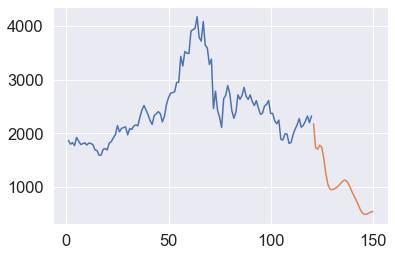

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[2040:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

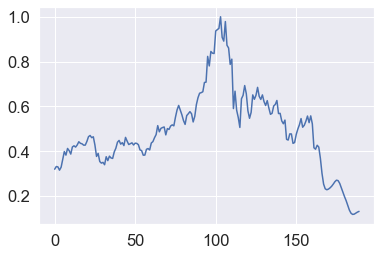

In [55]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)